In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels

In [104]:
df = pd.read_csv('Air_Delhi.csv', engine='python')

df[1:10]
# df.interpolate(method='linear',limit_direction='forward')

# plt.plot(dataset[1:500])
# plt.show()

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_id.1
1,55.0,India,Delhi,Delhi,"Alipur, Delhi - DPCC",30-09-19 11:00,PM10,33.0,103.0,58.0,NaN
2,56.0,India,Delhi,Delhi,"Alipur, Delhi - DPCC",30-09-19 11:00,NO2,24.0,47.0,32.0,NaN
3,57.0,India,Delhi,Delhi,"Alipur, Delhi - DPCC",30-09-19 11:00,NH3,3.0,6.0,4.0,NaN
4,58.0,India,Delhi,Delhi,"Alipur, Delhi - DPCC",30-09-19 11:00,SO2,14.0,20.0,17.0,NaN
5,59.0,India,Delhi,Delhi,"Alipur, Delhi - DPCC",30-09-19 11:00,CO,25.0,65.0,52.0,NaN
6,60.0,India,Delhi,Delhi,"Alipur, Delhi - DPCC",30-09-19 11:00,OZONE,4.0,76.0,32.0,NaN
7,61.0,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",30-09-19 11:00,PM2.5,17.0,80.0,41.0,NaN
8,62.0,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",30-09-19 11:00,PM10,17.0,135.0,70.0,NaN
9,63.0,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",30-09-19 11:00,NO2,26.0,85.0,48.0,NaN


In [105]:
df.dtypes

id                float64
country            object
state              object
city               object
station            object
last_update        object
pollutant_id       object
pollutant_min     float64
pollutant_max     float64
pollutant_avg     float64
pollutant_id.1    float64
dtype: object

In [128]:
dataset=df.loc[df.pollutant_id=='PM10']
pm10=dataset.loc[df.station=='Alipur, Delhi - DPCC']
pm10=pm10[['last_update','pollutant_avg']].copy()
pm10.head()

,last_update,pollutant_avg
1,30-09-19 11:00,58.0
48,01-10-19 12:00,60.0
95,01-10-19 12:00,60.0
142,01-10-19 1:00,64.0
189,01-10-19 2:00,67.0


# Missing Values
Finding the percentage of null values and replacing them with the mean

In [107]:
pm10.pollutant_avg.isnull().sum()

40

In [108]:
pm10.pollutant_avg.isnull().sum()/pm10.pollutant_avg.size * 100

6.6115702479338845

In [109]:
pm10=pm10.replace('NaN',np.NaN)
pm10.head()

,last_update,pollutant_avg
6,30-09-19 11:00,32.0
53,01-10-19 12:00,20.0
100,01-10-19 12:00,20.0
147,01-10-19 1:00,17.0
194,01-10-19 2:00,17.0


### missing values plot

Text(0.5, 0, 'Impurity time index')

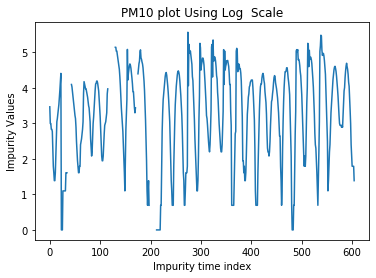

In [110]:
plt.plot(np.log(pm10.pollutant_avg.values))
plt.title("PM10 plot Using Log  Scale")
plt.ylabel("Impurity Values")
plt.xlabel("Impurity time index")

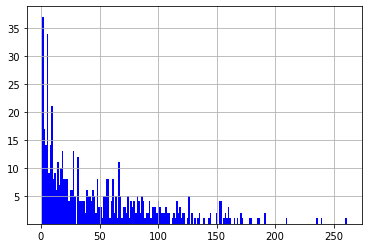

In [111]:
%matplotlib inline  
pm10.pollutant_avg.hist(bins=200,color='blue',bottom=0.1)

In [112]:
# pm10=pm10.rename(columns{'pollutant_avg':'PM10'},inplace=True)

# Replace missing values
Here with local mean

In [113]:
pm10=pm10.interpolate(method ='linear', limit_direction ='forward')
# pm10=pm10.dropna(axis = 0, how ='any')
# pm10=pm10.fillna(0,inplace = True)

plotting the newly added mean values

Text(0.5, 0, 'Impurity time index')

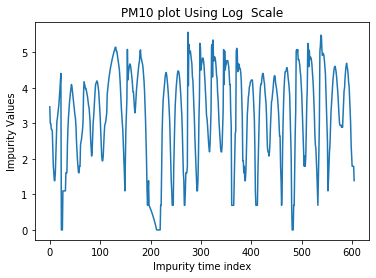

In [114]:
plt.plot(np.log(pm10.pollutant_avg.values))
plt.title("PM10 plot Using Log  Scale")
plt.ylabel("Impurity Values")
plt.xlabel("Impurity time index")

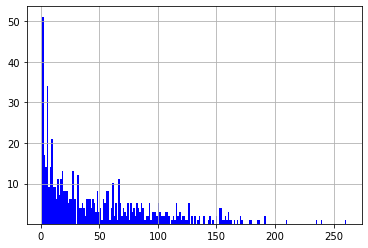

In [115]:
%matplotlib inline  
pm10.pollutant_avg.hist(bins=200,color='blue',bottom=0.1)

### Autocorrelation plots

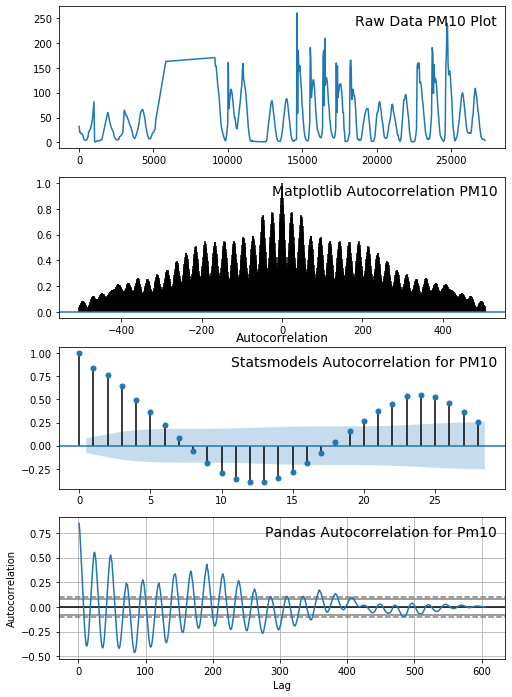

In [116]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics import tsaplots

fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(pm10.pollutant_avg)
label(axes[0],'Raw Data PM10 Plot')

axes[1].acorr(pm10.pollutant_avg, maxlags=pm10.pollutant_avg.size-100)
label(axes[1], 'Matplotlib Autocorrelation PM10')
print('\n')

tsaplots.plot_acf(pm10.pollutant_avg, axes[2])
label(axes[2], 'Statsmodels Autocorrelation for PM10')

pd.plotting.autocorrelation_plot(pm10.pollutant_avg, ax=axes[3])
label(axes[3], 'Pandas Autocorrelation for Pm10')


plt.show()

# Convert datetime to datetime format
pd.to_datetime()

In [117]:
pm10.last_update=pd.to_datetime(pm10.last_update)
pm10.last_update

6       2019-09-30 11:00:00
53      2019-01-10 12:00:00
100     2019-01-10 12:00:00
147     2019-01-10 01:00:00
194     2019-01-10 02:00:00
                ...        
27115   2019-10-29 05:00:00
27158   2019-10-29 06:00:00
27201   2019-10-29 06:00:00
27244   2019-10-29 06:00:00
27287   2019-10-29 07:00:00
Name: last_update, Length: 605, dtype: datetime64[ns]

In [118]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [119]:
# fix random seed for reproducibility
np.random.seed(7)
pm10.head()

,last_update,pollutant_avg
6,2019-09-30 11:00:00,32.0
53,2019-01-10 12:00:00,20.0
100,2019-01-10 12:00:00,20.0
147,2019-01-10 01:00:00,17.0
194,2019-01-10 02:00:00,17.0


In [120]:
scaler = MinMaxScaler(feature_range=(0, 1))
pm10 = scaler.fit_transform(pm10[['pollutant_avg']])

After we model our data and estimate the skill of our model on the training dataset, we need to get an idea of the skill of the model on new unseen data. For a normal classification or regression problem, we would do this using cross validation.

With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [121]:
# split into train and test sets
train_size = int(len(pm10) * 0.67)
test_size = len(pm10) - train_size
train, test = pm10[0:train_size,:], pm10[train_size:len(pm10),:]
print(len(train), len(test))

405 200


Now we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

In [122]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

Let’s use this function to prepare the train and test datasets for modeling.

In [123]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [124]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

We are now ready to design and fit our LSTM network for this problem.

The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [125]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

Train on 403 samples
Epoch 1/25
403/403 - 3s - loss: 0.0307
Epoch 2/25
403/403 - 1s - loss: 0.0201
Epoch 3/25
403/403 - 1s - loss: 0.0148
Epoch 4/25
403/403 - 1s - loss: 0.0120
Epoch 5/25
403/403 - 1s - loss: 0.0113
Epoch 6/25
403/403 - 1s - loss: 0.0113
Epoch 7/25
403/403 - 1s - loss: 0.0112
Epoch 8/25
403/403 - 1s - loss: 0.0111
Epoch 9/25
403/403 - 1s - loss: 0.0112
Epoch 10/25
403/403 - 1s - loss: 0.0110
Epoch 11/25
403/403 - 1s - loss: 0.0111
Epoch 12/25
403/403 - 1s - loss: 0.0110
Epoch 13/25
403/403 - 1s - loss: 0.0110
Epoch 14/25
403/403 - 1s - loss: 0.0110
Epoch 15/25
403/403 - 1s - loss: 0.0106
Epoch 16/25
403/403 - 1s - loss: 0.0109
Epoch 17/25
403/403 - 1s - loss: 0.0110
Epoch 18/25
403/403 - 1s - loss: 0.0110
Epoch 19/25
403/403 - 1s - loss: 0.0108
Epoch 20/25
403/403 - 1s - loss: 0.0107
Epoch 21/25
403/403 - 1s - loss: 0.0107
Epoch 22/25
403/403 - 1s - loss: 0.0107
Epoch 23/25
403/403 - 1s - loss: 0.0108
Epoch 24/25
403/403 - 1s - loss: 0.0107
Epoch 25/25
403/403 - 1s - l

Once the model is fit, we can estimate the performance of the model on the train and test datasets. This will give us a point of comparison for new models.

Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).

In [126]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26.59 RMSE
Test Score: 21.59 RMSE


Finally, we can generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

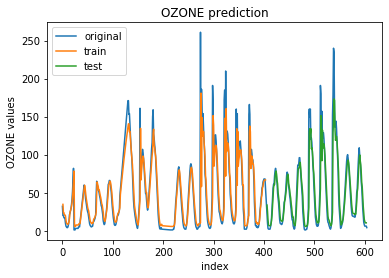

In [127]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(pm10)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(pm10)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(pm10)-1, :] = testPredict
# plot baseline and predictions
inv, =plt.plot(scaler.inverse_transform(pm10),label='original')
train, =plt.plot(trainPredictPlot,label='train')
test, =plt.plot(testPredictPlot,label='test')

plt.title("PM10 prediction")
plt.xlabel('index')
plt.ylabel('PM10 values')
plt.legend(handles=[inv,train,test],loc='upper left')
plt.show()
